In [1]:
import numpy as np
import pandas as pd

# A1

In [2]:
purchase_data = pd.read_csv(r'D:\Amrita\SEM 5\ML\Lab_1_features_data.csv')

In [3]:
features_vals = purchase_data.iloc[:,1:4]
target_vals = purchase_data.iloc[:,4:5]
##AX=C

In [7]:
features_vals

,Candies (#),Mangoes (Kg),Milk Packets (#)
0,20,6,2
1,16,3,6
2,27,6,2
3,19,1,2
4,24,4,2
5,22,1,5
6,15,4,2
7,18,4,2
8,21,1,4
9,16,2,4


In [8]:
target_vals

,Payment (Rs)
0,386
1,289
2,393
3,110
4,280
5,167
6,271
7,274
8,148
9,198


In [9]:
target_vals

,Payment (Rs)
0,386
1,289
2,393
3,110
4,280
5,167
6,271
7,274
8,148
9,198


In [10]:
target_vals.describe()

,Payment (Rs)
count,10.000000
mean,251.600000
std,95.425596
min,110.000000
25%,174.750000
50%,272.500000
75%,286.750000
max,393.000000


In [11]:
features_vals.describe()

,Candies (#),Mangoes (Kg),Milk Packets (#)
count,10.000000,10.000000,10.000000
mean,19.800000,3.200000,3.100000
std,3.823901,1.932184,1.523884
min,15.000000,1.000000,2.000000
25%,16.500000,1.250000,2.000000
50%,19.500000,3.500000,2.000000
75%,21.750000,4.000000,4.000000
max,27.000000,6.000000,6.000000


In [12]:

features_vals.shape


(10, 3)

In [13]:
target_vals.shape


(10, 1)

In [14]:
features_vals.rank(axis=1)#Ignore

,Candies (#),Mangoes (Kg),Milk Packets (#)
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,3.0,2.0,1.0
3,3.0,1.0,2.0
4,3.0,2.0,1.0
5,3.0,1.0,2.0
6,3.0,2.0,1.0
7,3.0,2.0,1.0
8,3.0,1.0,2.0
9,3.0,1.0,2.0


In [5]:
features_array = features_vals.to_numpy()
features_array

array([[20,  6,  2],
       [16,  3,  6],
       [27,  6,  2],
       [19,  1,  2],
       [24,  4,  2],
       [22,  1,  5],
       [15,  4,  2],
       [18,  4,  2],
       [21,  1,  4],
       [16,  2,  4]], dtype=int64)

In [6]:
target_array = target_vals.to_numpy()
target_array

array([[386],
       [289],
       [393],
       [110],
       [280],
       [167],
       [271],
       [274],
       [148],
       [198]], dtype=int64)

In [17]:
print("The Rank of Features Matrix: ", np.linalg.matrix_rank(features_array))
print("The Rank of Target Matrix: ", np.linalg.matrix_rank(target_array))

The Rank of Features Matrix:  3
The Rank of Target Matrix:  1


# A2

In [18]:
print("The Pseudo Inverse of Features Matrix: ",  np.linalg.pinv(features_array))

The Pseudo Inverse of Features Matrix:  [[-0.01008596 -0.03124505  0.01013951  0.0290728   0.0182907   0.01161794
  -0.00771348  0.00095458  0.01743623 -0.00542016]
 [ 0.09059668  0.07263726  0.03172933 -0.09071908 -0.01893196 -0.06926996
   0.05675464  0.03152577 -0.07641966  0.00357352]
 [ 0.00299878  0.15874243 -0.05795468 -0.06609024 -0.06295043  0.03348017
   0.01541831 -0.01070461  0.00029003  0.05938755]]


In [19]:
psv_features = np.linalg.pinv(features_array)
target_array = target_array.astype(np.float)

C:\Users\heman\AppData\Local\Temp\ipykernel_8320\2717862263.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target_array = target_array.astype(np.float)


In [20]:
X = np.dot(psv_features,target_array)
X
##Values of X = (A^-1).C
#3X10, 10X1 =1 column 3 rows

array([[ 1.],
       [55.],
       [18.]])

In [21]:
features_vals

,Candies (#),Mangoes (Kg),Milk Packets (#)
0,20,6,2
1,16,3,6
2,27,6,2
3,19,1,2
4,24,4,2
5,22,1,5
6,15,4,2
7,18,4,2
8,21,1,4
9,16,2,4


In [22]:
target_vals

,Payment (Rs)
0,386
1,289
2,393
3,110
4,280
5,167
6,271
7,274
8,148
9,198


# A3

In [23]:
target_vals["Payment (Rs)"] = target_vals["Payment (Rs)"].astype('int64')

In [25]:
def flag(df):
    if(df['Payment (Rs)']>200):
        return 'RICH'
    else:
        return 'POOR'
target_vals['Payment (Rs)'] = target_vals.apply(flag, axis=1)

In [26]:
target_vals

,Payment (Rs)
0,RICH
1,RICH
2,RICH
3,POOR
4,RICH
5,POOR
6,RICH
7,RICH
8,POOR
9,POOR


# Logistic Regression on data

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
log_reg = LogisticRegression()


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_vals, target_vals, test_size=0.30, random_state=42)

In [30]:
log_reg.fit(X_train,y_train.values.ravel())

LogisticRegression()

In [31]:
y_pred=log_reg.predict(X_test)

In [32]:
y_pred

array(['POOR', 'POOR', 'POOR'], dtype=object)

In [33]:
X_test

,Candies (#),Mangoes (Kg),Milk Packets (#)
8,21,1,4
1,16,3,6
5,22,1,5


Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression')

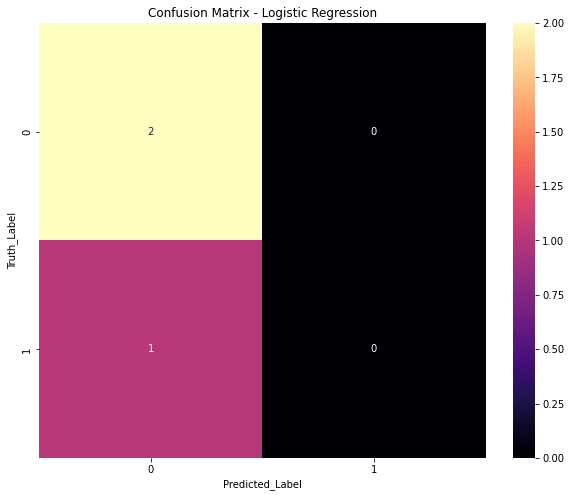

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
sn.heatmap(cm, annot=True, cmap= 'magma',  fmt='d', cbar=True)
plt.xlabel('Predicted_Label')
plt.ylabel('Truth_Label')
plt.title('Confusion Matrix - Logistic Regression')

In [35]:
score = log_reg.score(X_test, y_test)
print('Test Accuracy Score', score)
## 1/3rd of test cases are wrongly predicted

Test Accuracy Score 0.6666666666666666


# A4

In [4]:
irctc_data = pd.read_csv("D:\Amrita\SEM 5\ML\Lab_1_IRCTC.csv")

In [68]:
irctc_data.shape

(249, 10)

In [69]:
irctc_data.describe()

,Volume,Date,Year,Price,Chg
count,2.490000e+02,249.000000,249.000000,249.000000,249.000000
mean,1.516055e+06,15.534137,2020.485944,1560.663454,0.001964
std,2.011121e+06,8.768060,0.500809,242.347613,0.022488
min,8.450000e+04,1.000000,2020.000000,1300.550000,-0.102000
25%,3.939900e+05,8.000000,2020.000000,1366.500000,-0.006400
50%,9.374900e+05,16.000000,2020.000000,1438.250000,0.000000
75%,1.780000e+06,23.000000,2021.000000,1747.400000,0.009100
max,1.719000e+07,31.000000,2021.000000,2144.850000,0.139700


In [70]:
irctc_data.head()

,Open,High,Low,Volume,Month,Date,Day,Year,Price,Chg
0,"2,092.00","2,126.90","2,065.05",1670000,Jun,29,Tue,2021,2081.85,0.0020
1,"2,084.00","2,112.45","2,068.40",707730,Jun,28,Mon,2021,2077.75,0.0043
2,"2,084.35","2,088.50","2,053.10",475820,Jun,25,Fri,2021,2068.85,-0.0020
3,"2,098.00","2,098.00","2,066.00",541510,Jun,24,Thu,2021,2072.95,-0.0026
4,"2,102.00","2,111.40","2,072.00",809620,Jun,23,Wed,2021,2078.25,-0.0023


### Price mean for whole population is given in describe

In [71]:
irctc_data[["Price"]].describe()
#Mean = 1560 for population

,Price
count,249.000000
mean,1560.663454
std,242.347613
min,1300.550000
25%,1366.500000
50%,1438.250000
75%,1747.400000
max,2144.850000


In [72]:
print("Variance of Price: ", irctc_data['Price'].var())

Variance of Price:  58732.36535253918


In [73]:
irctc_wed = irctc_data.loc[irctc_data['Day'] == 'Wed', 'Price']

In [74]:
irctc_wed

4      2078.25
9      2089.95
14     2071.20
19     1917.95
24     1894.05
29     1858.10
33     1746.60
38     1723.65
43     1795.85
56     1709.00
60     1757.00
64     1760.55
69     1824.00
73     2018.50
78     1886.10
83     1675.45
88     1698.65
93     1618.40
98     1469.35
103    1438.25
107    1452.70
112    1461.15
117    1483.45
122    1434.95
126    1411.55
131    1423.40
136    1617.75
141    1349.90
145    1353.90
150    1365.30
154    1371.25
159    1300.55
164    1333.35
169    1331.75
174    1338.05
179    1356.90
183    1384.00
188    1372.85
193    1367.40
198    1348.90
203    1359.75
208    1369.30
213    1361.80
218    1386.80
223    1336.95
228    1352.75
233    1372.95
238    1351.95
243    1390.10
248    1363.05
Name: Price, dtype: float64

### Mean of price on wednesdays is 10 units lesser than the population

In [75]:
irctc_wed.describe()

count      50.000000
mean     1550.706000
std       240.706357
min      1300.550000
25%      1362.112500
50%      1429.175000
75%      1740.862500
max      2089.950000
Name: Price, dtype: float64

In [76]:
irctc_apr = irctc_data.loc[irctc_data['Month'] == 'Apr', 'Price']

In [77]:
irctc_apr

41    1791.40
42    1792.55
43    1795.85
44    1793.20
45    1730.85
46    1712.00
47    1673.05
48    1640.05
49    1612.70
50    1627.45
51    1608.10
52    1611.65
53    1582.00
54    1730.90
55    1726.40
56    1709.00
57    1688.55
58    1702.65
59    1751.75
Name: Price, dtype: float64

### Mean of Price in April Months is 138 units more than population

In [78]:
irctc_apr.describe()

count      19.000000
mean     1698.952632
std        69.839973
min      1582.000000
25%      1633.750000
50%      1709.000000
75%      1741.325000
max      1795.850000
Name: Price, dtype: float64

### Finding the probability of making a loss over the stock using change%

In [88]:
count_neg = irctc_data['Chg'].lt(0).sum()
count_pos = irctc_data['Chg'].gt(0).sum()
print(count_neg)
print(count_pos)

124
124


In [89]:
loss_percentage = (count_neg)/(count_neg+count_pos)
print(loss_percentage)

0.5


In [97]:
irctc_data

,Open,High,Low,Volume,Month,Date,Day,Year,Price,Chg
0,"2,092.00","2,126.90","2,065.05",1670000,Jun,29,Tue,2021,2081.85,0.0020
1,"2,084.00","2,112.45","2,068.40",707730,Jun,28,Mon,2021,2077.75,0.0043
2,"2,084.35","2,088.50","2,053.10",475820,Jun,25,Fri,2021,2068.85,-0.0020
3,"2,098.00","2,098.00","2,066.00",541510,Jun,24,Thu,2021,2072.95,-0.0026
4,"2,102.00","2,111.40","2,072.00",809620,Jun,23,Wed,2021,2078.25,-0.0023
...,...,...,...,...,...,...,...,...,...,...
244,"1,410.00","1,411.00","1,390.05",480210,Jul,7,Tue,2020,1397.40,-0.0024
245,"1,405.50","1,415.50","1,394.00",614930,Jul,6,Mon,2020,1400.75,-0.0031
246,"1,415.00","1,425.00","1,398.00",599490,Jul,3,Fri,2020,1405.10,-0.0051
247,"1,440.00","1,467.80","1,395.30",2160000,Jul,2,Thu,2020,1412.35,0.0362


### Probability of making a loss over stock using Change% is exactly 50% which means there are equal number of loss making and profit making days.

In [13]:
irctc_wed_chg = irctc_data.loc[irctc_data['Day'] == 'Wed', [False,False,False,False,False,False,False,False,True,True]]
#Selecting the required columns by sending a list of bool values which indicate what columns to be selected

In [14]:
irctc_wed_chg

,Price,Chg
4,2078.25,-0.0023
9,2089.95,-0.0038
14,2071.20,-0.0343
19,1917.95,0.0123
24,1894.05,-0.0073
29,1858.10,0.0126
33,1746.60,-0.0255
38,1723.65,-0.0263
43,1795.85,0.0015
56,1709.00,0.0121


In [19]:
count_neg = irctc_wed_chg['Chg'].lt(0).sum()
count_pos = irctc_wed_chg['Chg'].gt(0).sum()
print(count_neg)
print(count_pos)

29
21


In [38]:
loss_percentage = (count_neg)/(count_neg+count_pos)
print(loss_percentage)
profit_percentage = 21/249
print(profit_percentage)

0.58
0.08433734939759036


In [37]:
#P(A/B)=P(AnB)/P(B)
#P(profit/wed)=0.42/p(wed)
profit_conditional=21/(50)
print("Probability of making profit, given that today is Wednesday is: ",profit_conditional)

Probability of making profit, given that today is Wednesday is:  0.42


### Probability of making profit, given that today is Wednesday is:  0.42

### Porbability of making a profit on wednesday is 8.4%

<AxesSubplot:xlabel='Chg', ylabel='Day'>

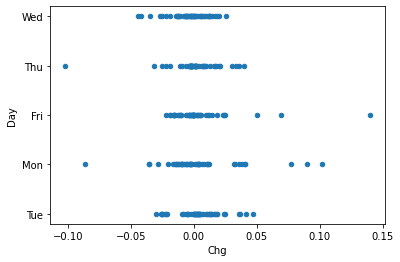

In [104]:
irctc_data.plot.scatter(x='Chg',y='Day')

### Scatter plot of Chg% vs Day in the dataframe

# Report Assignment

#### 1) Rank of a matrix helps in knowing the dimensionality of the data we are dealing with and also helps in creating the features list which we need to feed into the model, if rank of matrix is lesser than the min(row,col) then it can be inferred that we can further reduce the dimensionality and make it easier for our model to predict.

#### 2) A2 is a Regression problem as we have continous values to predict which we have done by calculating the value of X=(A^-1).(C) and we recieve the answer in an array telling us the X,Y,Z values correcponding to the data which we have given.
#### A3 is a Classification problem as we have encoded the values of last column as "RICH" or "POOR" and we are predicting that column based on the features list (or) other columns, we use logistic regression to help us predict the values and due to a small dataset and limited hyperparameter tuning we do not get high accuracy in our model.

#### 3) We can use a simple ANN for predicting the price and change% as most ML models work on existing curves to predict new values, such as Linear or Polynomial use only Linear lines to predict data and polynomial lines, but if our data is prone to changes and we need to see patterns then using a simple ANN with 2-3 Hidden layers and ReLU activation we can better predict the data.

In [29]:
correlation_matrix0 = np.corrcoef(features_array[:,0], target_array[:,0])
# def generate_correlation_map(x, y):
#     mu_x = x.mean(1)
#     mu_y = y.mean(1)
#     n = x.shape[1]
#     if n != y.shape[1]:
#         raise ValueError('x and y must ' +
#                          'have the same number of timepoints.')
#     s_x = x.std(1, ddof=n - 1)
#     s_y = y.std(1, ddof=n - 1)
#     cov = np.dot(x,
#                  y.T) - n * np.dot(mu_x[:, np.newaxis],
#                                   mu_y[np.newaxis, :])
#     return cov / np.dot(s_x[:, np.newaxis], s_y[np.newaxis, :])
# correlation_matrix = generate_correlation_map(features_array, target_array)
# print(correlation_matrix)

In [30]:
print(correlation_matrix0)

[[1.         0.27258753]
 [0.27258753 1.        ]]


In [31]:
correlation_matrix1 = np.corrcoef(features_array[:,1], target_array[:,0])

In [32]:
print(correlation_matrix1)

[[1.         0.97070182]
 [0.97070182 1.        ]]


In [33]:
correlation_matrix2 = np.corrcoef(features_array[:,2], target_array[:,0])

In [34]:
print(correlation_matrix2)

[[ 1.         -0.31984528]
 [-0.31984528  1.        ]]
